In [154]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
import torch
import sys
sys.path.append('../../tools')
sys.path.append("../../data/preprocessing/")
from NNInterface import NNInterface as NNI

In [156]:
class RandomModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.linear = torch.nn.Linear(input_size, output_size)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [237]:
tl = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(100, 100).float(), torch.randint(0, 2, (100, 1))), batch_size=10)
vl = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(100, 100).float(), torch.randint(0, 2, (100, 1))), batch_size=100)
te = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(100, 100).float(), torch.randint(0, 2, (100, 1))), batch_size=100)
ho = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.rand(15, 100).float(), torch.randint(0, 2, (15, 1))), batch_size=15)

In [238]:
model = RandomModel(100, 1)

In [239]:
nni = NNI(model, torch.nn.BCEWithLogitsLoss(), torch.optim.Adam(model.parameters()), (100//10, 100))

In [240]:
_ = nni.train(tl, 5, val_dl=vl)

--- Training ---
Epoch [1/5], Batch [5/10], Train Loss: 0.6679, Train acc: 0.60
Epoch [1/5], Batch [10/10], Train Loss: 0.7663, Train acc: 0.40
Overall Train acc for Epoch [0] was 0.500
VAL Epoch [1/5], Batch [10/1], Val Loss: 0.7112, Val acc: 0.51 <<<
Epoch [2/5], Batch [5/10], Train Loss: 0.6674, Train acc: 0.60
Epoch [2/5], Batch [10/10], Train Loss: 0.7562, Train acc: 0.40
Overall Train acc for Epoch [1] was 0.500
VAL Epoch [2/5], Batch [10/1], Val Loss: 0.7072, Val acc: 0.51 <<<
Epoch [3/5], Batch [5/10], Train Loss: 0.6676, Train acc: 0.60
Epoch [3/5], Batch [10/10], Train Loss: 0.7476, Train acc: 0.40
Overall Train acc for Epoch [2] was 0.500
VAL Epoch [3/5], Batch [10/1], Val Loss: 0.7041, Val acc: 0.51 <<<
Epoch [4/5], Batch [5/10], Train Loss: 0.6681, Train acc: 0.60
Epoch [4/5], Batch [10/10], Train Loss: 0.7407, Train acc: 0.40
Overall Train acc for Epoch [3] was 0.500
VAL Epoch [4/5], Batch [10/1], Val Loss: 0.7018, Val acc: 0.51 <<<
Epoch [5/5], Batch [5/10], Train Loss: 

In [241]:
_ = nni.test(te, verbose = True, cutoff = 0.59)


--- Testing ---
Test Accuracy of the model: 0.460 %

+---------------------------------------+
| First 25 labels mapped to predictions |
+----------+----------+-----------------+
|  Index   |  Label   |    Prediction   |
+----------+----------+-----------------+
|    0     |  [0.0]   |      [0.0]      |
|    1     |  [1.0]   |      [0.0]      |
|    2     |  [1.0]   |      [0.0]      |
|    3     |  [1.0]   |      [0.0]      |
|    4     |  [1.0]   |      [0.0]      |
|    5     |  [1.0]   |      [0.0]      |
|    6     |  [0.0]   |      [0.0]      |
|    7     |  [0.0]   |      [1.0]      |
|    8     |  [1.0]   |      [0.0]      |
|    9     |  [1.0]   |      [0.0]      |
|    10    |  [0.0]   |      [0.0]      |
|    11    |  [0.0]   |      [0.0]      |
|    12    |  [1.0]   |      [0.0]      |
|    13    |  [1.0]   |      [0.0]      |
|    14    |  [1.0]   |      [0.0]      |
|    15    |  [1.0]   |      [0.0]      |
|    16    |  [0.0]   |      [0.0]      |
|    17    |  [1.0]   

In [225]:
import os
os.chdir("/Users/druc594/Library/CloudStorage/OneDrive-PNNL/Desktop/DeepKS/images/ROC")

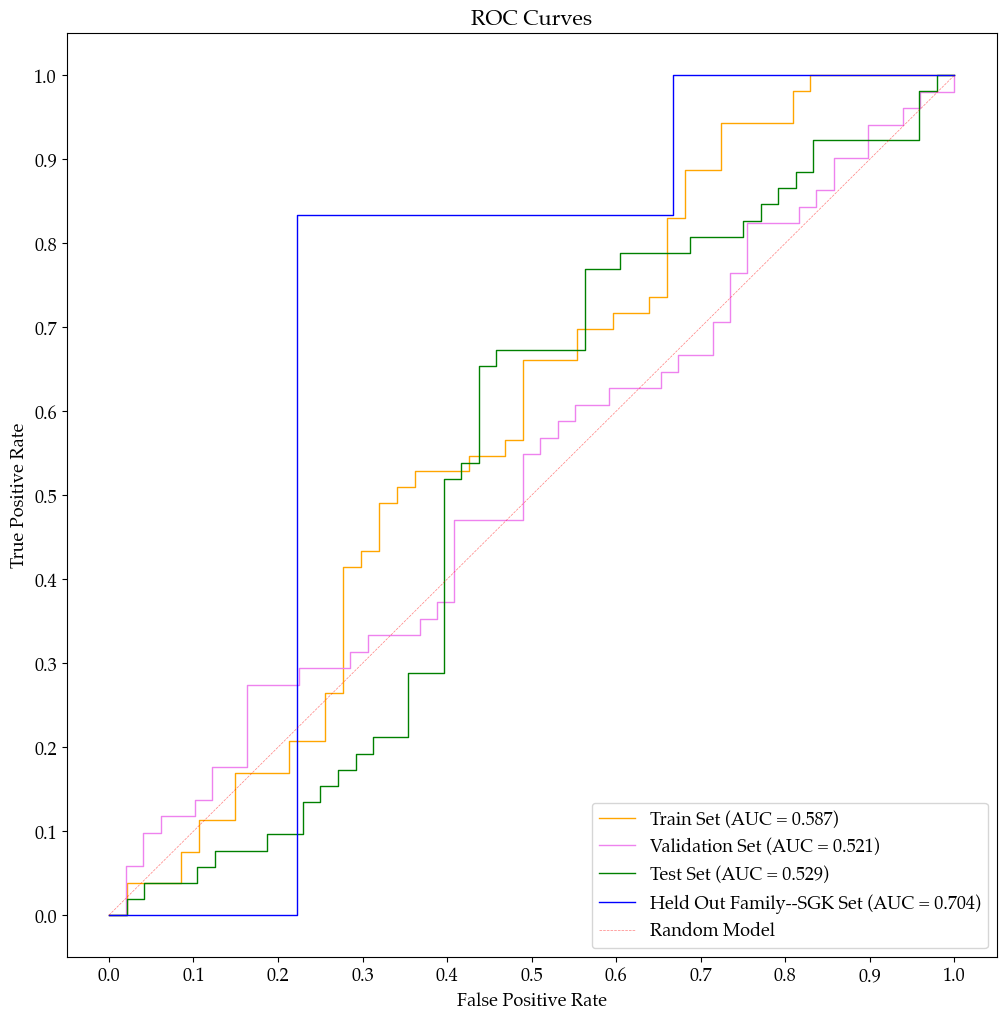

In [243]:
nni.get_all_rocs(tl, vl, te, ho, savefile = "./ROCC")